In [50]:
# Imports
from matplotlib import pyplot as py
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import csv
import io
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten,Dense



# importing the models to be used
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


directory = r"Directory/path"

# Open train_data.csv files
df_healthcare = pd.read_csv(directory, na_filter=True)

from sklearn.cluster import KMeans # Kmeans Clustering
from xgboost import XGBClassifier # Ensemble method (Xxtreme Gradient Boosting)
from sklearn.cluster import KMeans # Clustering


In [51]:
# Working with above file (df)
print(df_healthcare.shape)
print(df_healthcare.head(10))
print(df_healthcare.isnull().values.any())
df_healthcare_null = df_healthcare[df_healthcare.isnull().any(axis=1)]
print(df_healthcare_null.head(10))

(318438, 18)
   case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
0        1              8                  c                   3   
1        2              2                  c                   5   
2        3             10                  e                   1   
3        4             26                  b                   2   
4        5             26                  b                   2   
5        6             23                  a                   6   
6        7             32                  f                   9   
7        8             23                  a                   6   
8        9              1                  d                  10   
9       10             10                  e                   1   

  Hospital_region_code  Available Extra Rooms in Hospital    Department  \
0                    Z                                  3  radiotherapy   
1                    Z                                  2  radiotherapy   
2            

In [52]:
# dropping null rows and not needed columns
df_healthcare = df_healthcare.dropna()
print(df_healthcare.shape)
df_healthcare.drop("case_id",inplace=True, axis=1) # dropping case_id column
df_healthcare.drop("City_Code_Hospital",inplace=True, axis=1) # dropping City_Code_Hospital column
df_healthcare.drop("Hospital_region_code",inplace=True, axis=1)
df_healthcare.drop("Available Extra Rooms in Hospital",inplace=True, axis=1)
df_healthcare.drop("Ward_Facility_Code",inplace=True, axis=1)
df_healthcare.drop("Bed Grade",inplace=True, axis=1)
df_healthcare.drop("patientid",inplace=True, axis=1)
df_healthcare.drop("City_Code_Patient",inplace=True, axis=1)
#df_healthcare.drop("Visitors with Patient",inplace=True, axis=1)
df_healthcare = df_healthcare.head(25000)
df_healthcare_1 = df_healthcare.copy()


(313793, 18)


In [53]:
df_healthcare.head(10)

,Hospital_code,Hospital_type_code,Department,Ward_Type,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,radiotherapy,R,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,radiotherapy,S,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,anesthesia,S,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,radiotherapy,R,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,radiotherapy,S,Trauma,Extreme,2,51-60,5558.0,41-50
5,23,a,anesthesia,S,Trauma,Extreme,2,51-60,4449.0,11-20
6,32,f,radiotherapy,S,Emergency,Extreme,2,51-60,6167.0,0-10
7,23,a,radiotherapy,Q,Trauma,Extreme,2,51-60,5571.0,41-50
8,1,d,gynecology,R,Trauma,Extreme,2,51-60,7223.0,51-60
9,10,e,gynecology,S,Trauma,Extreme,2,51-60,6056.0,31-40


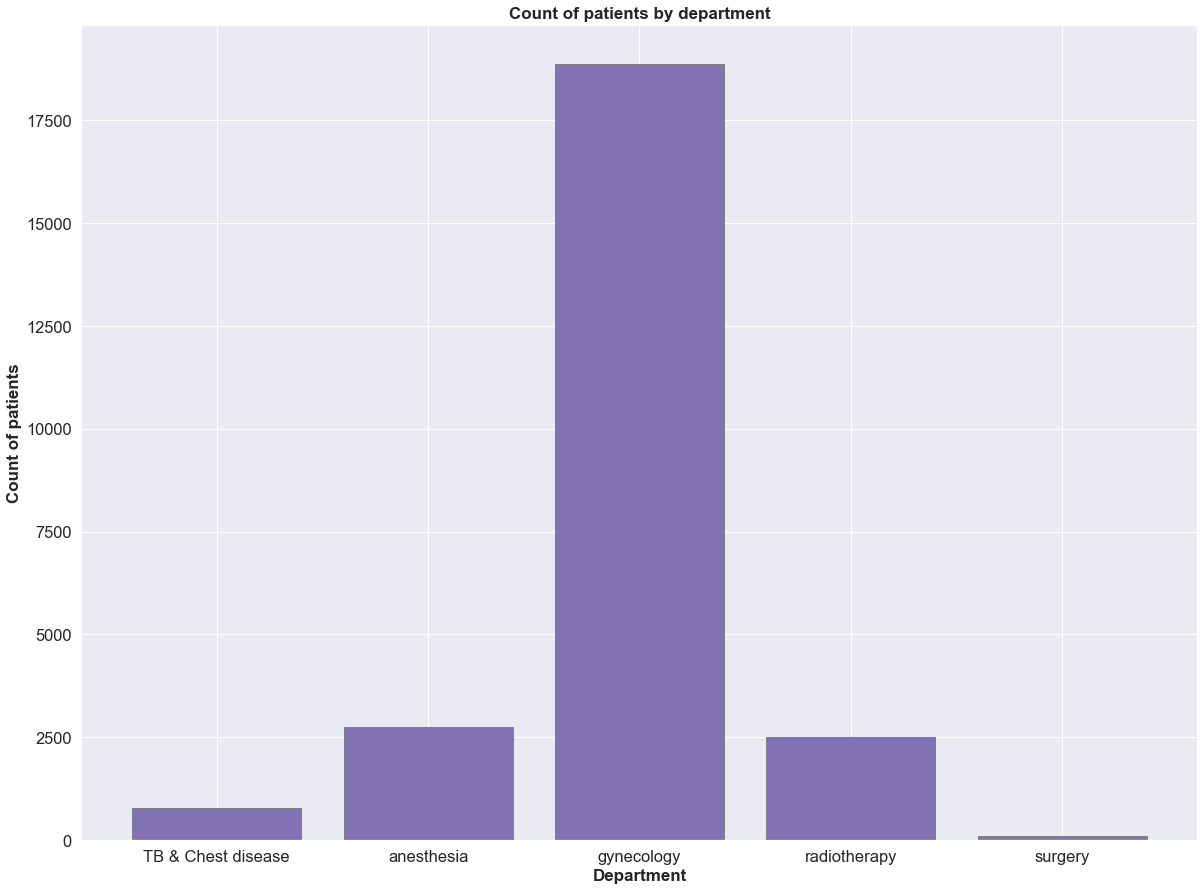

In [54]:
# Distribution of admission by hospital department

department_dict = dict(df_healthcare.groupby('Department').size())

plt.rcParams["figure.figsize"] = (20,15)

plt.bar(x=department_dict.keys(), height=department_dict.values(),color ='m', edgecolor ='grey')
sns.set(font_scale=1.5)


plt.xlabel('Department', fontweight ='bold', fontsize = 17)
plt.ylabel('Count of patients', fontweight ='bold', fontsize = 17)
plt.title('Count of patients by department', fontweight ='bold', fontsize = 17)
print('\n\n')
plt.show()

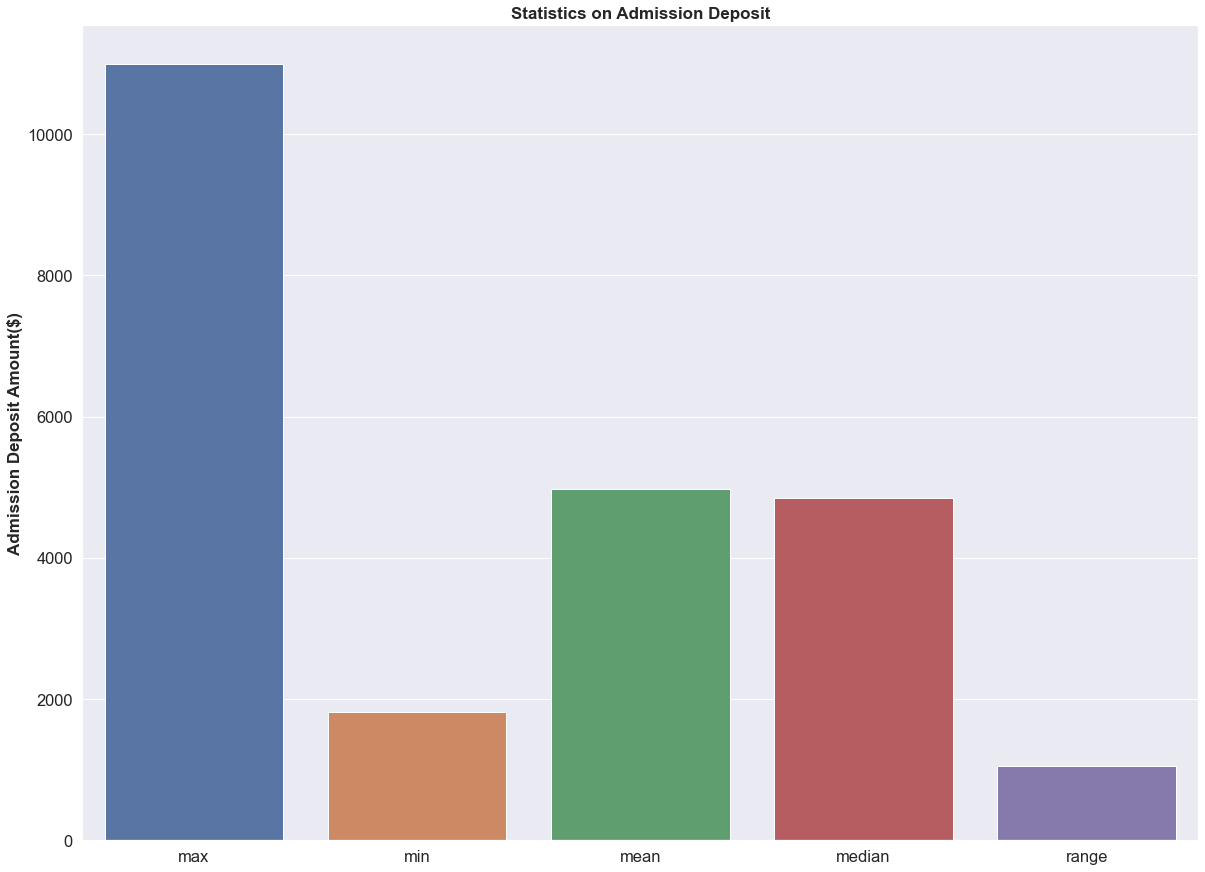

In [55]:
# Plotting the mean, median, min, max and standard deviations of admission deposit 

df_max = df_healthcare["Admission_Deposit"].max()
df_min = df_healthcare["Admission_Deposit"].min()
df_mean = df_healthcare["Admission_Deposit"].mean()
df_median = df_healthcare["Admission_Deposit"].median()
df_std = df_healthcare["Admission_Deposit"].std()
x = ["max","min","mean","median","range"]
y = [df_max,df_min,df_mean,df_median,df_std]

plt.rcParams["figure.figsize"] = (20,15)
sns.set(font_scale=1.5)

sns.barplot(x = x, y = y)
plt.title('Statistics on Admission Deposit', fontweight ='bold', fontsize = 17)
plt.ylabel('Admission Deposit Amount($)', fontweight ='bold', fontsize = 17)
plt.show()



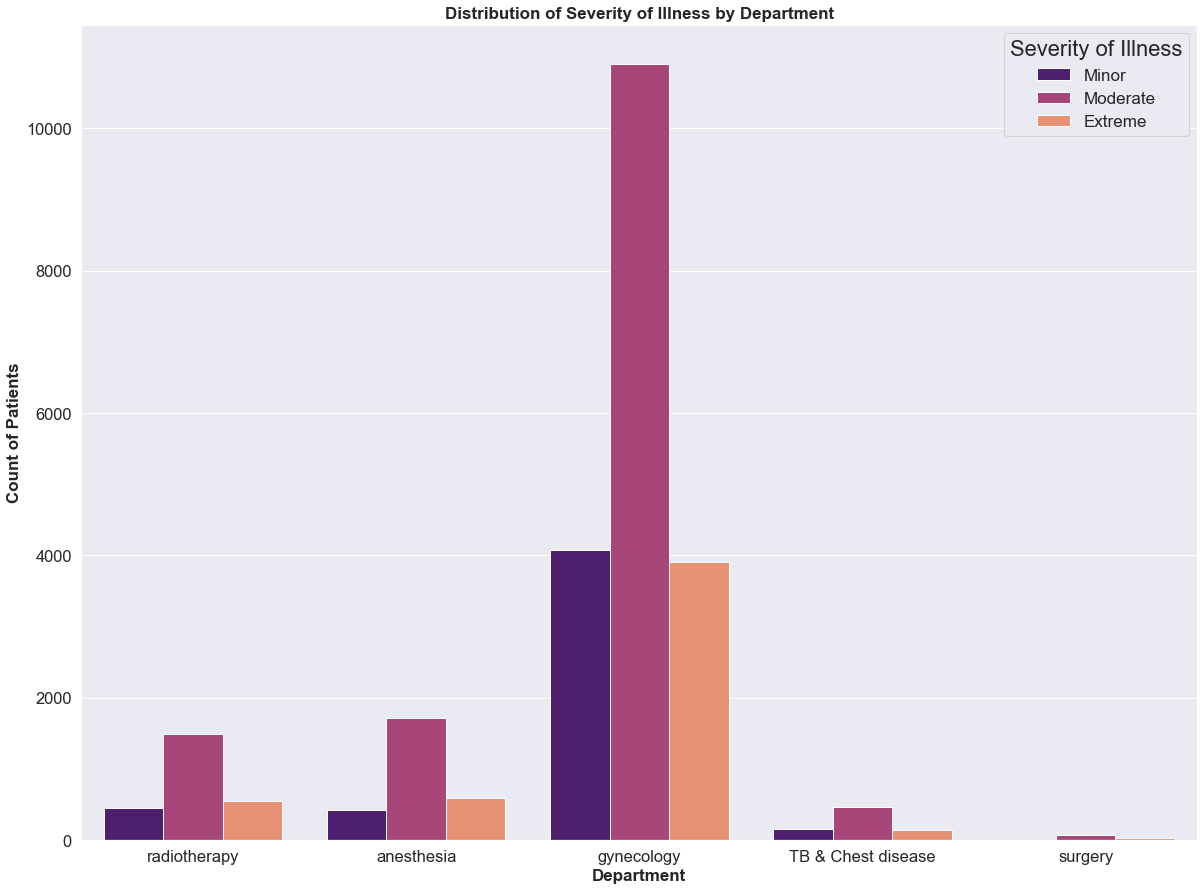

In [56]:
# count plot of severity of illness by department

hue_order = ['Minor',"Moderate","Extreme"]
ax  = sns.countplot(x = 'Department', hue = 'Severity of Illness', hue_order = hue_order, data = df_healthcare, palette = 'magma')
plt.title('Distribution of Severity of Illness by Department', fontweight ='bold', fontsize = 17)
plt.xlabel('Department', fontweight ='bold', fontsize = 17)
plt.ylabel('Count of Patients', fontweight ='bold', fontsize = 17)
sns.set(font_scale=1.5)
plt.setp(ax.get_legend().get_texts(), fontsize='17')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.show()

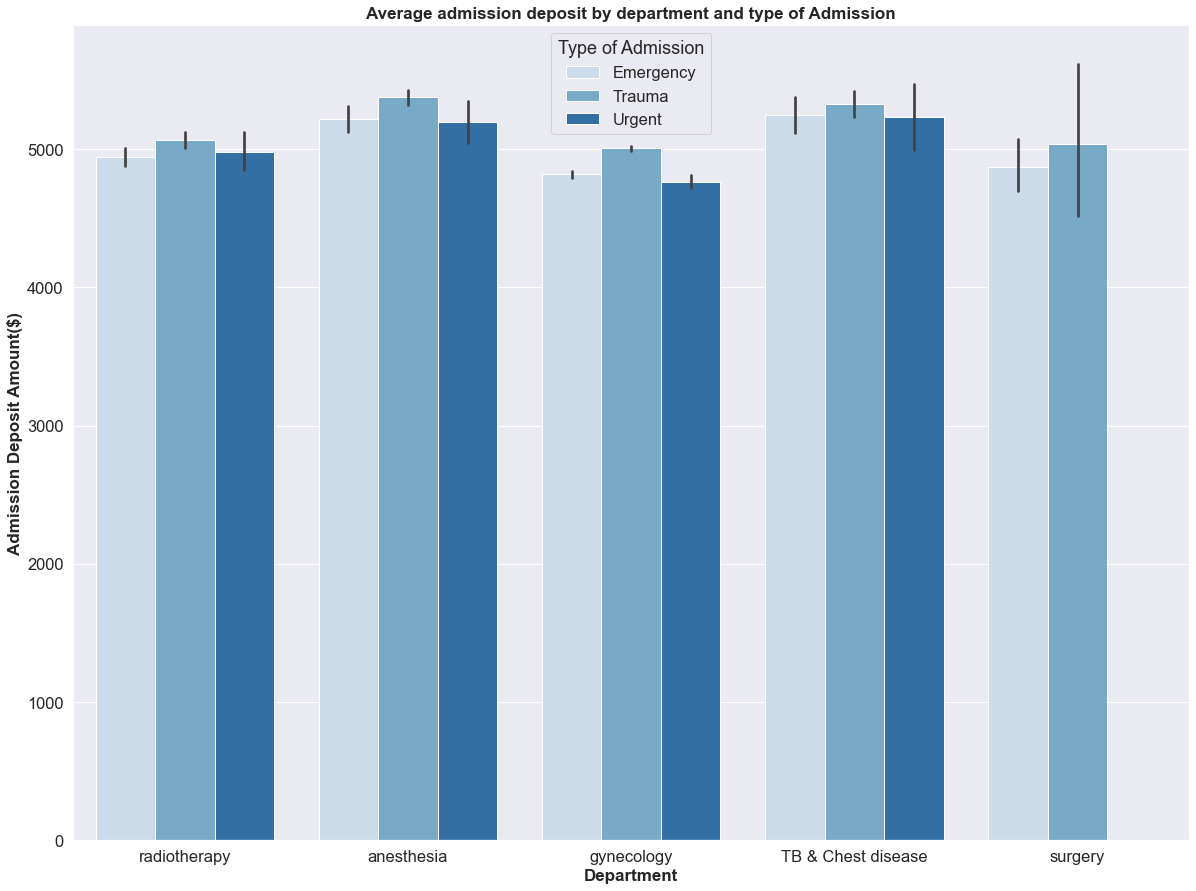

In [57]:
# Average Admission depositby department and type of admission

plt.setp(ax.get_legend().get_texts(), fontsize='17')
plt.setp(ax.get_legend().get_title(), fontsize='22')
sns.set(font_scale=1.5)
ax = sns.barplot(x = 'Department', y = 'Admission_Deposit', hue = 'Type of Admission', data = df_healthcare, \
            palette = 'Blues', edgecolor = 'w')
sns.set_style("whitegrid")
df_healthcare.groupby(['Department','Type of Admission']).mean()

plt.title('Average admission deposit by department and type of Admission', fontweight ='bold', fontsize = 17)
plt.xlabel('Department', fontweight ='bold', fontsize = 17)
plt.ylabel('Admission Deposit Amount($)', fontweight ='bold', fontsize = 17)

plt.show()

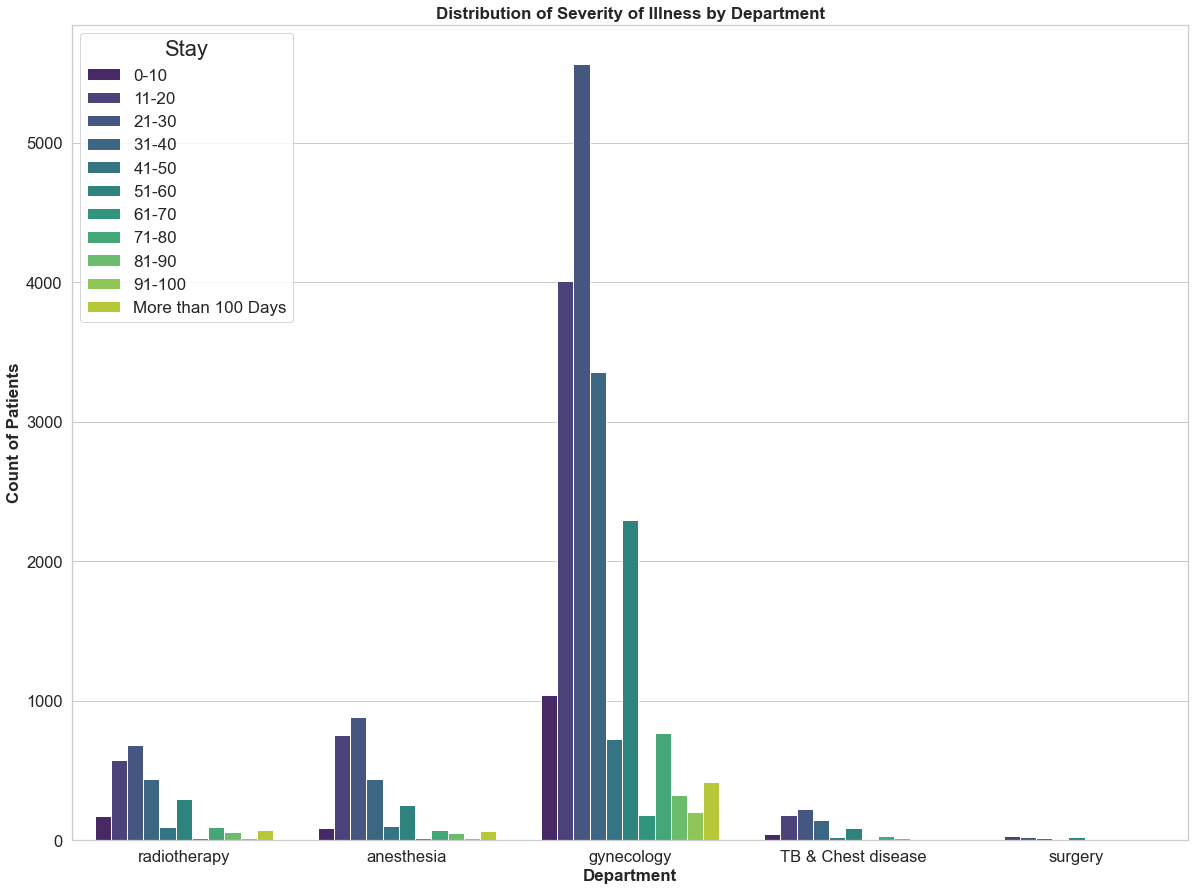

In [58]:
# count plot of length of stay by department

hue_order = ['0-10', '11-20', '21-30','31-40', '41-50', '51-60','61-70', '71-80', '81-90','91-100','More than 100 Days']
ax  = sns.countplot(x = 'Department', hue = 'Stay', hue_order=hue_order, data = df_healthcare, palette = 'viridis')
plt.title('Distribution of Severity of Illness by Department', fontweight ='bold', fontsize = 17)
plt.xlabel('Department', fontweight ='bold', fontsize = 17)
plt.ylabel('Count of Patients', fontweight ='bold', fontsize = 17)
sns.set(font_scale=1.5)
plt.setp(ax.get_legend().get_texts(), fontsize='17')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.show()

In [59]:
df_healthcare.head(30)
#df_healthcare.drop("Admission_Deposit",inplace=True, axis=1)

def normalize_data(dataframe,nameOfColumns):
    for column in nameOfColumns:
        dataframe[column] = (dataframe[column] - dataframe[column].min()) / (dataframe[column].max() - dataframe[column].min()) # performing normalization calculation

nameOfColumns = ['Admission_Deposit']
normalize_data(df_healthcare,nameOfColumns)

In [60]:
# ZeroR algorithm
mydict = []
sumcount = 0
for label_val in pd.unique(df_healthcare.Stay):
    count = df_healthcare.loc[df_healthcare["Stay"].str.contains(label_val)].shape[0]
    sumcount += count
    mydict.append(count)
ZeroR = (max(mydict) / sumcount) * 100
print(ZeroR)

29.532000000000004


In [62]:
# Encoding the non numerical fields
def encode_categorical(dataframe, column):
    dataframe[column] = label_encoder.fit_transform(dataframe[column])
    name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    return name_mapping

Hospital_type_code_name_mapping = encode_categorical(df_healthcare,'Hospital_type_code')
Department_name_mapping = encode_categorical(df_healthcare,'Department')
Ward_Type_name_mapping = encode_categorical(df_healthcare,'Ward_Type')
Type_of_Admission_name_mapping = encode_categorical(df_healthcare,'Type of Admission')
Severity_of_Illness_name_mapping = encode_categorical(df_healthcare,'Severity of Illness')
Age_name_mapping = encode_categorical(df_healthcare,'Age')
Stay_name_mapping = encode_categorical(df_healthcare,'Stay')
Visitors_with_Patient_mapping = encode_categorical(df_healthcare,'Visitors with Patient')



In [63]:
df_healthcare.head(10)

,Hospital_code,Hospital_type_code,Department,Ward_Type,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,2,3,2,0,0,2,5,0.336747,0
1,2,2,3,3,1,0,2,5,0.450376,4
2,10,4,1,3,1,0,2,5,0.318662,3
3,26,1,3,2,1,0,2,5,0.593964,4
4,26,1,3,3,1,0,2,5,0.407234,4
5,23,0,1,3,1,0,2,5,0.286415,1
6,32,5,3,3,0,0,2,5,0.473581,0
7,23,0,3,1,1,0,2,5,0.408650,4
8,1,3,2,2,1,0,2,5,0.588626,5
9,10,4,2,3,1,0,2,5,0.461488,3


In [65]:
# Preparing Datasets for 1R algorithm using univariate logistic
headers = ["Hospital_code","Hospital_type_code","Department","Ward_Type","Type of Admission","Severity of Illness",'Visitors with Patient',"Age","Stay"]

df_Hospital_code = df_healthcare.copy()
df_Hospital_code.drop(['Hospital_type_code', 'Department', 'Ward_Type','Type of Admission','Severity of Illness', 'Visitors with Patient','Age'], axis=1, inplace=True)

df_Hospital_type_code = df_healthcare.copy()
df_Hospital_type_code.drop(['Hospital_code', 'Department', 'Ward_Type','Type of Admission','Severity of Illness', 'Visitors with Patient','Age'], axis=1, inplace=True)

df_Department = df_healthcare.copy()
df_Department.drop(['Hospital_type_code','Hospital_code', 'Ward_Type','Type of Admission','Severity of Illness', 'Visitors with Patient', 'Age'], axis=1, inplace=True)

df_Ward_Type = df_healthcare.copy()
df_Ward_Type.drop(['Hospital_type_code','Hospital_code', 'Department','Type of Admission','Severity of Illness','Visitors with Patient','Age'], axis=1, inplace=True)

df_Type_of_Admission = df_healthcare.copy()
df_Type_of_Admission.drop(['Hospital_type_code','Hospital_code', 'Department','Ward_Type','Severity of Illness','Visitors with Patient','Age'], axis=1, inplace=True)

df_Severity_of_Illness = df_healthcare.copy()
df_Severity_of_Illness.drop(['Hospital_type_code','Hospital_code', 'Department','Ward_Type','Type of Admission','Visitors with Patient','Age'], axis=1, inplace=True)

df_Visitors_with_Patient = df_healthcare.copy()
df_Visitors_with_Patient.drop(['Hospital_type_code','Hospital_code', 'Department','Ward_Type','Severity of Illness','Type of Admission','Age'], axis=1, inplace=True)

df_Age = df_healthcare.copy()
df_Age.drop(['Hospital_type_code','Hospital_code', 'Department','Ward_Type','Severity of Illness','Type of Admission','Visitors with Patient'], axis=1, inplace=True)

df_Admission_Deposit = df_healthcare.copy()
df_Admission_Deposit.drop(['Hospital_type_code','Hospital_code', 'Department','Ward_Type','Severity of Illness','Type of Admission','Visitors with Patient','Age'], axis=1, inplace=True)


In [66]:
# function to split dataframe
def split_columns(dataframe):
    array = dataframe.values # used to get a numpy representation of the data. Only values are returned. Headers are removed
    InputFields = array[:,:-1] # captures all the fields except for the last which is the output field to be predicted
    OutputLabel = array[:,-1] # captures only the output label to be predicted which is the last field
    return InputFields, OutputLabel

In [67]:
# Calculating OneR prediction (using one variable)
OneR = []
def Logistic(InputFields, OutputLabel):
    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr'))) 

    results = [] # list to hold the results
    names = [] # list to hold name abbreviations of the algorithms
    for name, model in models:
        kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
        cv_results = cross_val_score(model, InputFields, OutputLabel, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        accuracy = cv_results.mean() * 100
        return accuracy

InputFields, OutputLabel = split_columns(df_Hospital_code)
Hospital_code_accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Hospital_code_accuracy)

InputFields, OutputLabel = split_columns(df_Hospital_type_code)
Hospital_type_code_accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Hospital_type_code_accuracy)

InputFields, OutputLabel = split_columns(df_Department)
Department_accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Department_accuracy)

InputFields, OutputLabel = split_columns(df_Ward_Type)
Ward_Type_Accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Ward_Type_Accuracy)

InputFields, OutputLabel = split_columns(df_Type_of_Admission)
Type_of_Admission_Accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Type_of_Admission_Accuracy)

InputFields, OutputLabel = split_columns(df_Severity_of_Illness)
Severity_of_Illness_Accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Severity_of_Illness_Accuracy)

InputFields, OutputLabel = split_columns(df_Visitors_with_Patient)
Visitors_with_Patient_Accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Visitors_with_Patient_Accuracy)

InputFields, OutputLabel = split_columns(df_Age)
Age_Accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Age_Accuracy)

InputFields, OutputLabel = split_columns(df_Admission_Deposit)
df_Admission_Deposit_Accuracy = Logistic(InputFields, OutputLabel)
OneR.append(df_Admission_Deposit_Accuracy)

OneRmax = max(OneR)
print(OneRmax)


[29.531999999999996, 29.547999999999995, 29.528, 30.412, 29.744000000000003, 29.531999999999996, 33.032000000000004, 29.54, 29.535999999999994]
33.032000000000004


In [68]:
InputFields, OutputLabel = split_columns(df_healthcare)

# this line splits the dataset with training as 70% and test as 30%. The radon_state parameter is used for reproducibility
X_train, X_validation, Y_train, Y_validation = train_test_split(InputFields, OutputLabel, test_size=0.30, random_state=1)


In [69]:
# Removing Outliers
iso = IsolationForest(contamination=0.1) # containment values shoule be between [0, 0.5]
outliers = iso.fit_predict(X_train)
non_outliers = outliers != -1
X_train, Y_train = X_train[non_outliers, :], Y_train[non_outliers]

In [70]:
# getting the algorithms needed to do the predictions
models = [] # list to hold all the algorithms
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr'))) # Logistic Regression
models.append(('LDA', LinearDiscriminantAnalysis())) # Linear Discriminant Analysis
models.append(('KNN', KNeighborsClassifier())) # K-Nearest Neighbors
models.append(('CART', DecisionTreeClassifier())) # Classification and Regression Trees
models.append(('NB', GaussianNB())) # Gaussian Naive Bayes
models.append(('SVM', SVC(gamma='auto'))) # Support Vector Machines
models.append(('Random Forest', RandomForestClassifier(max_depth=2, random_state=0)))
models.append(('XGB', XGBClassifier(use_label_encoder=False)))

models_dict = {}
results = [] # list to hold the results
names = [] # list to hold name abbreviations of the algorithms
for name, model in models:
    model_results = []
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    print(name, ': ',cv_results.mean())
    model_results.append(cv_results.mean() * 100)
    models_dict[name] = model_results

LR :  0.3803809523809524
LDA :  0.3826031746031746
KNN :  0.34609523809523807
CART :  0.2927619047619048
NB :  0.3695873015873016
SVM :  0.3974603174603175
Random Forest :  0.3676825396825397
[11:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:12:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:12:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'mu

In [20]:
# adding prior models to the model dictionary
models_dict["Model"] = ["Accuracy Score"]
models_dict["ZeroR"] = [ZeroR]
models_dict["OneR"] = [OneRmax]

In [21]:
# Results
Answer_dict = {}

Answer_dict["Model"] = ["ZeroR","OneR","LR","LDA","KNN","DT","NB","SVM","RF","XGB"]
models_df=pd.DataFrame.from_dict(models_dict,orient='index').transpose() # converting to dataframe

models_df = models_df[["ZeroR","OneR","LR","LDA","KNN","CART","NB","SVM","Random Forest","XGB"]] # re-arranging the columns
models_df.head().style.hide_index() # hides the index while showing the dataframe

ZeroR,OneR,LR,LDA,KNN,CART,NB,SVM,Random Forest,XGB
29.532000,33.112000,37.638095,37.968254,33.695238,33.034921,37.231746,39.492063,33.168254,39.669841


Text(0, 0.5, 'Inertia')

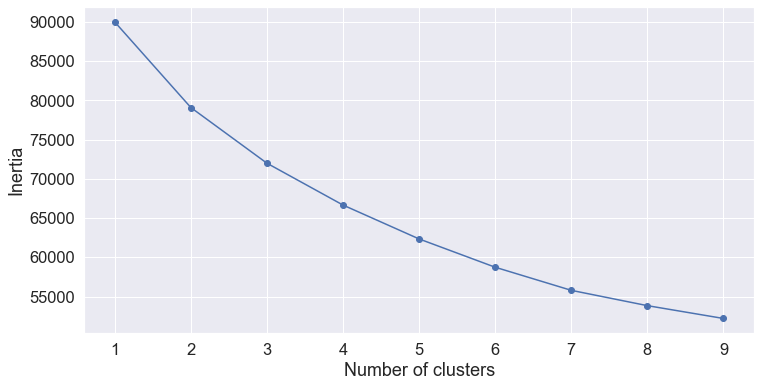

In [22]:
# fitting multiple k-means algorithms and storing the values in an empty list
data_scaled = scaler.fit_transform(df_healthcare.head(10000))
SSE = []
num_of_clusters = range(1,10)
for cluster in num_of_clusters:
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':num_of_clusters, 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


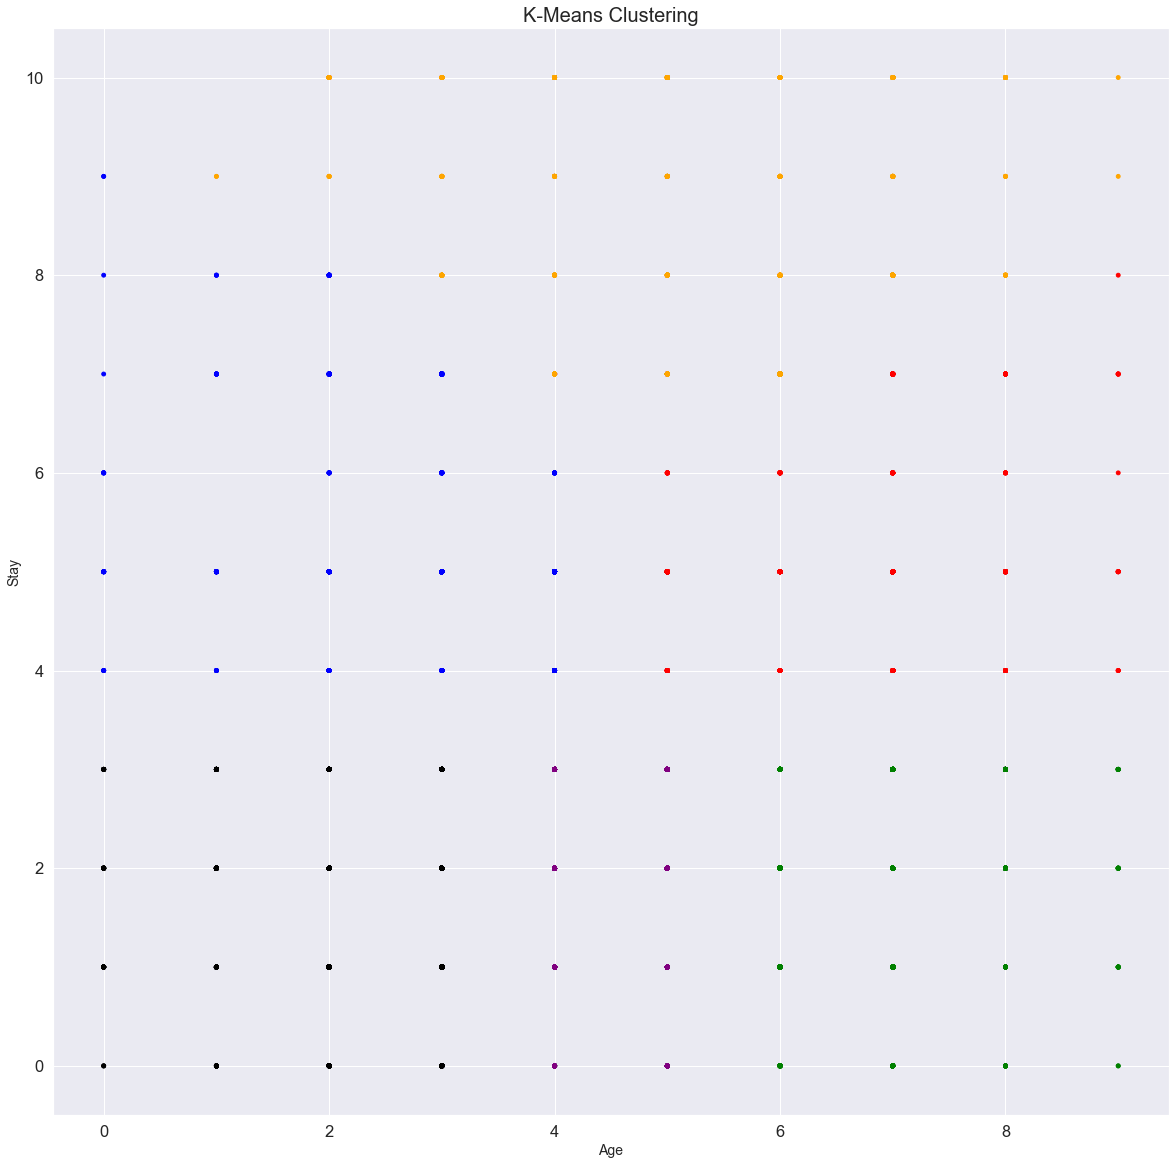

In [23]:
# K-means clustering
df_cluster = df_healthcare.copy()
df_cluster = df_cluster.head(10000)

Kmean = KMeans(n_clusters=6,random_state=2)
df_cluster['pred'] = Kmean.fit_predict(df_cluster[['Age','Stay']])

df_cluster['KMeans_labels']= Kmean.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green','orange','black']
plt.figure(figsize=(20,20))
plt.scatter(df_cluster.Age, df_cluster.Stay,c=df_cluster['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15, alpha=1)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Stay',fontsize=14)
plt.show()


In [24]:
# Changing the class variable to binary (>30 days and less than 30 days)

less_than_a_month = ['0-10','11-20','21-30','31-40']
more_than_a_month = ['31-40','41-50','51-60','61-70','71-80','81-90','91-100','More than 100 Days']
for entry in less_than_a_month:
    df_healthcare_1['Stay'] = df_healthcare_1['Stay'].replace(entry, 0,regex=True)
                     
for entry in more_than_a_month:
    df_healthcare_1['Stay'] = df_healthcare_1['Stay'].replace(entry, 1,regex=True)
    
# ZeroR algorithm
mydict = []
sumcount = 0
df_healthcare_1.Stay = df_healthcare_1.Stay.astype(str)
for label_val in pd.unique(df_healthcare_1.Stay):
    count = df_healthcare_1.loc[df_healthcare_1["Stay"].str.contains(label_val)].shape[0]
    sumcount += count
    mydict.append(count)
ZeroR = (max(mydict) / sumcount) * 100
df_healthcare_1.Stay = df_healthcare_1.Stay.astype(int)
print(ZeroR)
                    
# encoding
Hospital_type_code_name_mapping = encode_categorical(df_healthcare_1,'Hospital_type_code')
Department_name_mapping = encode_categorical(df_healthcare_1,'Department')
Ward_Type_name_mapping = encode_categorical(df_healthcare_1,'Ward_Type')
Type_of_Admission_name_mapping = encode_categorical(df_healthcare_1,'Type of Admission')
Severity_of_Illness_name_mapping = encode_categorical(df_healthcare_1,'Severity of Illness')
Age_name_mapping = encode_categorical(df_healthcare_1,'Age')
Visitors_with_Patient_mapping = encode_categorical(df_healthcare_1,'Visitors with Patient')


74.7


In [25]:
# Preparing Datasets for 1R algorithm using univariate logistic
headers = ["Hospital_code","Hospital_type_code","Department","Ward_Type","Type of Admission","Severity of Illness",'Visitors with Patient',"Age","Stay"]

df_Hospital_code = df_healthcare_1.copy()
df_Hospital_code.drop(['Hospital_type_code', 'Department', 'Ward_Type','Type of Admission','Severity of Illness', 'Visitors with Patient','Age'], axis=1, inplace=True)

df_Hospital_type_code = df_healthcare_1.copy()
df_Hospital_type_code.drop(['Hospital_code', 'Department', 'Ward_Type','Type of Admission','Severity of Illness', 'Visitors with Patient','Age'], axis=1, inplace=True)

df_Department = df_healthcare_1.copy()
df_Department.drop(['Hospital_type_code','Hospital_code', 'Ward_Type','Type of Admission','Severity of Illness', 'Visitors with Patient', 'Age'], axis=1, inplace=True)

df_Ward_Type = df_healthcare_1.copy()
df_Ward_Type.drop(['Hospital_type_code','Hospital_code', 'Department','Type of Admission','Severity of Illness','Visitors with Patient','Age'], axis=1, inplace=True)

df_Type_of_Admission = df_healthcare_1.copy()
df_Type_of_Admission.drop(['Hospital_type_code','Hospital_code', 'Department','Ward_Type','Severity of Illness','Visitors with Patient','Age'], axis=1, inplace=True)

df_Severity_of_Illness = df_healthcare_1.copy()
df_Severity_of_Illness.drop(['Hospital_type_code','Hospital_code', 'Department','Ward_Type','Type of Admission','Visitors with Patient','Age'], axis=1, inplace=True)

df_Visitors_with_Patient = df_healthcare_1.copy()
df_Visitors_with_Patient.drop(['Hospital_type_code','Hospital_code', 'Department','Ward_Type','Severity of Illness','Type of Admission','Age'], axis=1, inplace=True)

df_Age = df_healthcare_1.copy()
df_Age.drop(['Hospital_type_code','Hospital_code', 'Department','Ward_Type','Severity of Illness','Type of Admission','Visitors with Patient'], axis=1, inplace=True)


In [26]:
OneR = []

InputFields, OutputLabel = split_columns(df_Hospital_code)
Hospital_code_accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Hospital_code_accuracy)

InputFields, OutputLabel = split_columns(df_Hospital_type_code)
Hospital_type_code_accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Hospital_type_code_accuracy)

InputFields, OutputLabel = split_columns(df_Department)
Department_accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Department_accuracy)

InputFields, OutputLabel = split_columns(df_Ward_Type)
Ward_Type_Accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Ward_Type_Accuracy)

InputFields, OutputLabel = split_columns(df_Type_of_Admission)
Type_of_Admission_Accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Type_of_Admission_Accuracy)

InputFields, OutputLabel = split_columns(df_Severity_of_Illness)
Severity_of_Illness_Accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Severity_of_Illness_Accuracy)

InputFields, OutputLabel = split_columns(df_Visitors_with_Patient)
Visitors_with_Patient_Accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Visitors_with_Patient_Accuracy)

InputFields, OutputLabel = split_columns(df_Age)
Age_Accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Age_Accuracy)

OneRmax = max(OneR)
print(OneR)
print(OneRmax)

[74.70000000000002, 74.70000000000002, 74.70000000000002, 74.74400000000001, 74.70000000000002, 74.70000000000002, 79.324, 74.70000000000002]
79.324


In [27]:
InputFields, OutputLabel = split_columns(df_healthcare_1)

# this line splits the dataset with training as 70% and test as 30%. The radon_state parameter is used for reproducibility
X_train, X_validation, Y_train, Y_validation = train_test_split(InputFields, OutputLabel, test_size=0.30, random_state=1)


In [28]:
# Removing Outliers
iso = IsolationForest(contamination=0.1) # containment values shoule be between [0, 0.5]
outliers = iso.fit_predict(X_train)
non_outliers = outliers != -1
X_train, Y_train = X_train[non_outliers, :], Y_train[non_outliers]

In [29]:
# getting the algorithms needed to do the predictions
models = [] # list to hold all the algorithms
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr'))) # Logistic Regression
models.append(('LDA', LinearDiscriminantAnalysis())) # Linear Discriminant Analysis
models.append(('KNN', KNeighborsClassifier())) # K-Nearest Neighbors
models.append(('CART', DecisionTreeClassifier())) # Classification and Regression Trees
models.append(('NB', GaussianNB())) # Gaussian Naive Bayes
models.append(('SVM', SVC(gamma='auto'))) # Support Vector Machines
models.append(('Random Forest', RandomForestClassifier(max_depth=2, random_state=0)))
models.append(('XGB', XGBClassifier(use_label_encoder=False)))

models_dict = {}
results = [] # list to hold the results
names = [] # list to hold name abbreviations of the algorithms
for name, model in models:
    model_results = []
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    cv_results1 = cross_val_score(model, InputFields, OutputLabel, cv=kfold, scoring='roc_auc')
    model_results.append(cv_results1.mean())
    model_results.append(cv_results.mean() * 100)
    models_dict[name] = model_results
    print(name, ': ',cv_results.mean())

LR :  0.8116825396825398
LDA :  0.8275555555555554
KNN :  0.7483174603174604
CART :  0.7623492063492063
NB :  0.8139682539682541
SVM :  0.7619047619047619
Random Forest :  0.7811428571428572
[10:45:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:45:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:45:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binar

In [30]:
# adding prior models to the model dictionary
models_dict["Model"] = ["AUC", "Accuracy"]
models_dict["ZeroR"] = ["N/A", ZeroR]
models_dict["OneR"] = ["N/A", OneRmax]


In [31]:
# Results
Answer_dict = {}

Answer_dict["AUC"] = ["N/A","N/A",models_dict["LR"],models_dict["LDA"],models_dict["KNN"],models_dict["CART"],models_dict["NB"],models_dict["SVM"],models_dict["Random Forest"],models_dict["XGB"]]
models_df=pd.DataFrame.from_dict(models_dict,orient='index').transpose() # converting to dataframe


models_df = models_df[["Model","ZeroR","OneR","LR","LDA","KNN","CART","NB","SVM","Random Forest","XGB"]] # re-arranging the columns
models_df.head().style.hide_index() # hides the index while showing the dataframe

Model,ZeroR,OneR,LR,LDA,KNN,CART,NB,SVM,Random Forest,XGB
AUC,N/A,N/A,0.781700,0.813389,0.624472,0.688656,0.806335,0.664994,0.815474,0.841408
Accuracy,74.700000,79.324000,81.168254,82.755556,74.831746,76.234921,81.396825,76.190476,78.114286,83.923810


In [32]:
# Make predictions on validation dataset using logistical regression
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, Y_train) # fitting the model with the train data set
predictions = model.predict(X_validation)

[10:51:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [47]:
# Evaluate predictions on the validation dataset
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy = (accuracy_score(Y_validation, predictions))*100
F_1 = (classification_report(Y_validation, predictions))
print("XGB Accuracy on Test Data set:", Accuracy,'%')

[[5133  449]
 [ 814 1104]]
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      5582
         1.0       0.71      0.58      0.64      1918

    accuracy                           0.83      7500
   macro avg       0.79      0.75      0.76      7500
weighted avg       0.82      0.83      0.83      7500

XGB Accuracy on Test Data set: 83.16 %


No Skill: ROC AUC=0.500
XGB: ROC AUC=0.841


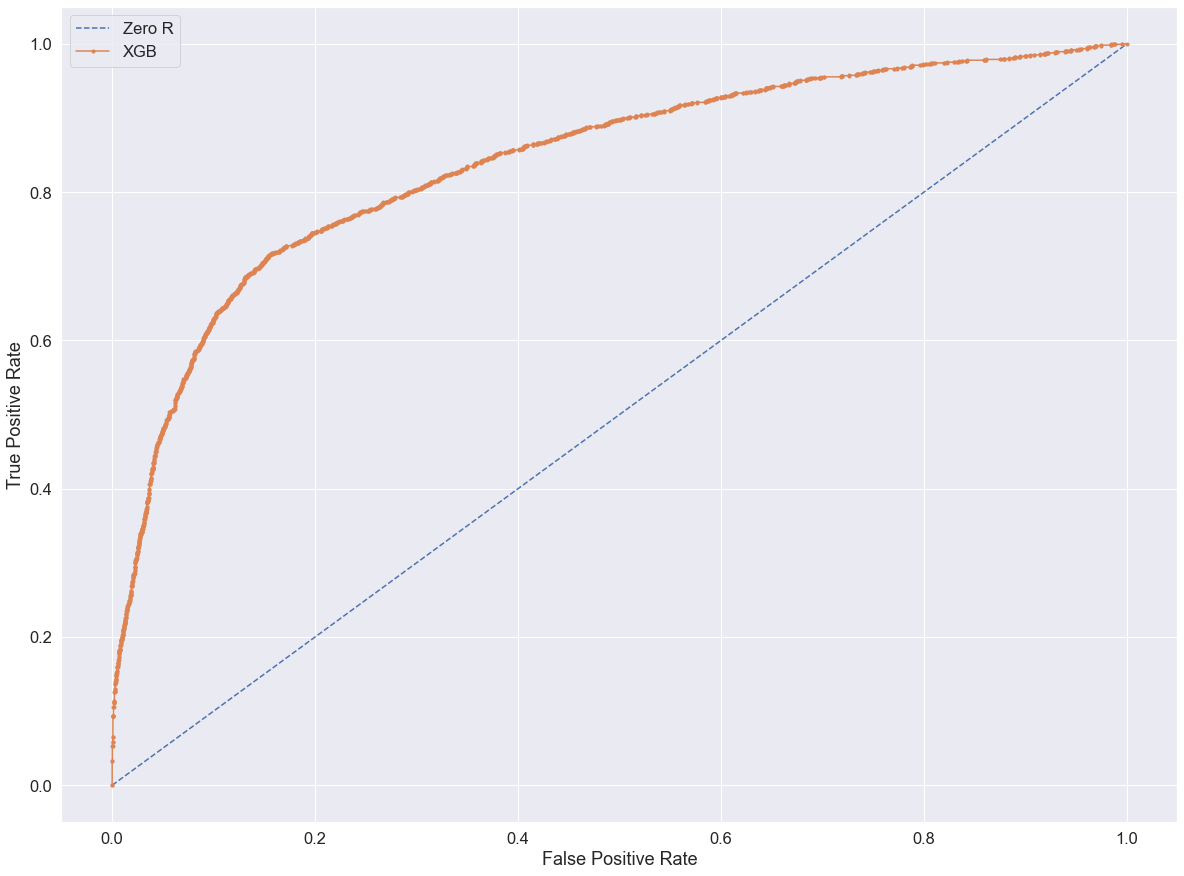

In [48]:
# Calculating and plotting ROC curves
# Using Zero R (predicting majority class all the time)
Zoro_R_probs = [0 for _ in range(len(Y_validation))]
ns_probs = [0 for _ in range(len(Y_validation))]
# predict probabilities using the logistic regression
XGB_probs = model.predict_proba(X_validation)
# limiting the probabilities to just the positive outcome
XGB_probs = XGB_probs[:, 1]
# calculating the scores
ns_auc = roc_auc_score(Y_validation, ns_probs)
XGB_auc = roc_auc_score(Y_validation, XGB_probs)
# Printing the AUC for the Zoro R and LR models
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGB: ROC AUC=%.3f' % (XGB_auc))
# calculating ROC curve true positive, false positive, true negative, false negative
ns_fpr, ns_tpr, _ = roc_curve(Y_validation, ns_probs)
XGB_fpr, XGB_tpr, _ = roc_curve(Y_validation, XGB_probs)
# plotting the roc curve for the model
py.plot(ns_fpr, ns_tpr, linestyle='--', label='Zero R')
py.plot(XGB_fpr, XGB_tpr, marker='.', label='XGB')
# axis labels
py.xlabel('False Positive Rate')
py.ylabel('True Positive Rate')
# show the legend
py.legend()
py.show()
